In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
df = pd.read_csv("SPY1Min.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.head(10)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.000
1,2019-04-02 09:31:00,292.970
2,2019-04-02 09:32:00,295.120
3,2019-04-02 09:33:00,296.280
4,2019-04-02 09:34:00,296.570
5,2019-04-02 09:35:00,297.900
6,2019-04-02 09:36:00,294.873
7,2019-04-02 09:37:00,295.160
8,2019-04-02 09:38:00,294.560
9,2019-04-02 09:39:00,297.519


In [5]:
df1.describe()

,marketClose
count,96327.000000
mean,305.436257
std,21.554990
min,219.800000
25%,295.030000
50%,304.340000
75%,318.709000
max,355.690000


In [6]:
df1.isna()

,DateTime,marketClose
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
96497,False,False
96498,False,False
96499,False,False
96500,False,False


In [7]:
df1.isna().sum()

DateTime         0
marketClose    175
dtype: int64

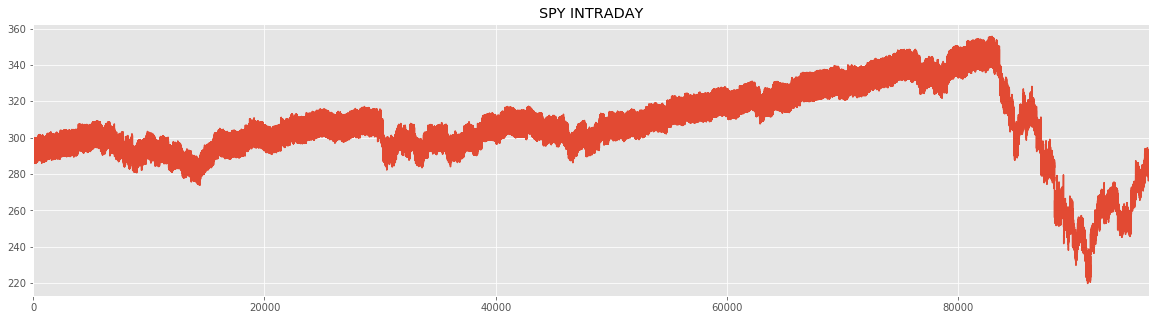

In [8]:
df1.marketClose.plot(figsize = (20,5), title = "SPY INTRADAY")
plt.show()

In [9]:
# Time Series(stock price) data does not follow normal distribution because it does not follow Gauss-Markov assumption

In [10]:
import scipy.stats
import pylab

### X axis - Theoritical quantiles is how many standard deviaiton away from mean
### Y axis - Stock Prices


In [11]:
# Quantile-Quantile plot(QQ plot) is used to check whether the distribution is normal or not

C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


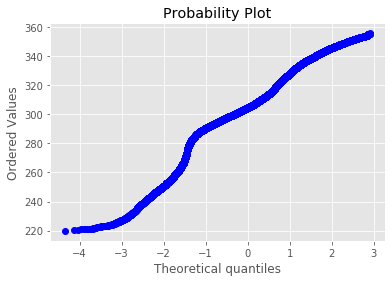

In [12]:
scipy.stats.probplot(df1.marketClose,plot = pylab)
pylab.show()

In [13]:
###Not Normally distributed as it is not following linear graph

In [14]:
#df1["DateTime"] =  df1['Date'] + ' ' + df1['Time']

In [15]:
df1.head(10)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.000
1,2019-04-02 09:31:00,292.970
2,2019-04-02 09:32:00,295.120
3,2019-04-02 09:33:00,296.280
4,2019-04-02 09:34:00,296.570
5,2019-04-02 09:35:00,297.900
6,2019-04-02 09:36:00,294.873
7,2019-04-02 09:37:00,295.160
8,2019-04-02 09:38:00,294.560
9,2019-04-02 09:39:00,297.519


In [16]:
df1['DateTime'] = pd.to_datetime(df1.DateTime,dayfirst = True)

In [17]:
df1.head(10)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.000
1,2019-04-02 09:31:00,292.970
2,2019-04-02 09:32:00,295.120
3,2019-04-02 09:33:00,296.280
4,2019-04-02 09:34:00,296.570
5,2019-04-02 09:35:00,297.900
6,2019-04-02 09:36:00,294.873
7,2019-04-02 09:37:00,295.160
8,2019-04-02 09:38:00,294.560
9,2019-04-02 09:39:00,297.519


In [18]:
df1.DateTime.describe()

count                   96502
unique                  96502
top       2019-05-21 11:43:00
freq                        1
first     2019-04-02 09:30:00
last      2020-04-09 15:59:00
Name: DateTime, dtype: object

In [19]:
#df1 = df1.drop(['Date','Time'],axis=1)

In [20]:
#df1.head(10)

In [21]:
df1 = df1.set_index(df1['DateTime'])

In [22]:
df1.head(5)

,DateTime,marketClose
DateTime,,
2019-04-02 09:30:00,2019-04-02 09:30:00,300.00
2019-04-02 09:31:00,2019-04-02 09:31:00,292.97
2019-04-02 09:32:00,2019-04-02 09:32:00,295.12
2019-04-02 09:33:00,2019-04-02 09:33:00,296.28
2019-04-02 09:34:00,2019-04-02 09:34:00,296.57


In [23]:
df1 = df1.drop(['DateTime'],axis=1)

In [24]:
df1.head(5)

,marketClose
DateTime,
2019-04-02 09:30:00,300.00
2019-04-02 09:31:00,292.97
2019-04-02 09:32:00,295.12
2019-04-02 09:33:00,296.28
2019-04-02 09:34:00,296.57


In [25]:
df2 = df1.copy()

In [26]:
df2 = df2.dropna()

In [27]:
df2.isna().sum()

marketClose    0
dtype: int64

##Setting the desired frequency

In [28]:
df_comp = df2.resample('5Min').mean()

In [29]:
df_comp.head(90)

,marketClose
DateTime,
2019-04-02 09:30:00,296.1880
2019-04-02 09:35:00,296.0024
2019-04-02 09:40:00,288.9542
2019-04-02 09:45:00,292.1286
2019-04-02 09:50:00,292.0962
...,...
2019-04-02 16:35:00,NaN
2019-04-02 16:40:00,NaN
2019-04-02 16:45:00,NaN


In [30]:
df_comp = df_comp.dropna()

In [31]:
df2.isna().sum()

marketClose    0
dtype: int64

In [32]:
df2.head(3)

,marketClose
DateTime,
2019-04-02 09:30:00,300.00
2019-04-02 09:31:00,292.97
2019-04-02 09:32:00,295.12


### Working on df2 as it already resampled to 5 min


###If you want to fill missing values, you can use following methods to fill missing values
df2.Close = df2.Close.fillna(method = 'ffill')
df2.Close = df2.Close.fillna(method = 'bfill')
df2.Close = df2.Close.fillna(value = df2.Close.mean())

## 

In [33]:
size = int(len(df2)*0.8)

In [34]:
df_train = df2.iloc[:size]

In [35]:
df_test = df2.iloc[size:]

In [36]:
df_train.tail(5)

,marketClose
DateTime,
2020-01-28 10:48:00,339.144
2020-01-28 10:49:00,330.300
2020-01-28 10:50:00,336.910
2020-01-28 10:51:00,330.080
2020-01-28 10:52:00,328.190


In [37]:
df_test.head(5)

,marketClose
DateTime,
2020-01-28 10:53:00,336.820
2020-01-28 10:54:00,329.810
2020-01-28 10:55:00,326.860
2020-01-28 10:56:00,336.018
2020-01-28 10:57:00,327.470


## WHITE NOISE

In [38]:
# A time series is white noise if the variables are independent and identically distributed with a mean of zero. 
# This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values
# in the series

In [39]:
#If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast
#errors are not white noise, it suggests improvements could be made to the predictive model.

In [40]:
wn = np.random.normal(loc = df_train.marketClose.mean(), scale = df_train.marketClose.std(), size = len(df_train))

In [41]:
df_train['wn'] = wn

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_train.describe()

,marketClose,wn
count,77061.000000,77061.000000
mean,307.448464,307.500182
std,14.233115,14.205457
min,273.760000,247.145275
25%,297.100000,297.856625
50%,304.514000,307.459120
75%,315.690000,317.164471
max,348.600000,365.570755


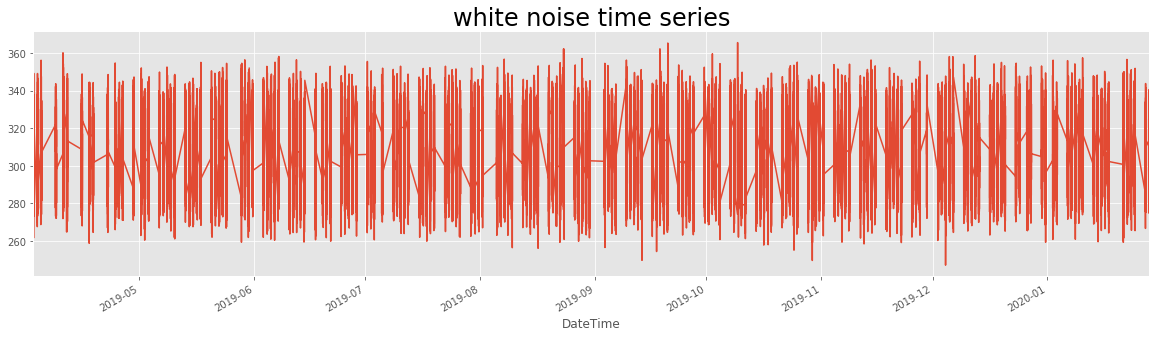

In [43]:
df_train.wn.plot(figsize = (20,5))
plt.title('white noise time series',size=24)
plt.show()

In [44]:
df_train.head(10)

,marketClose,wn
DateTime,,
2019-04-02 09:30:00,300.000,299.513947
2019-04-02 09:31:00,292.970,309.319731
2019-04-02 09:32:00,295.120,333.707076
2019-04-02 09:33:00,296.280,311.854687
2019-04-02 09:34:00,296.570,299.331662
2019-04-02 09:35:00,297.900,290.480510
2019-04-02 09:36:00,294.873,316.634085
2019-04-02 09:37:00,295.160,315.485071
2019-04-02 09:38:00,294.560,343.258171


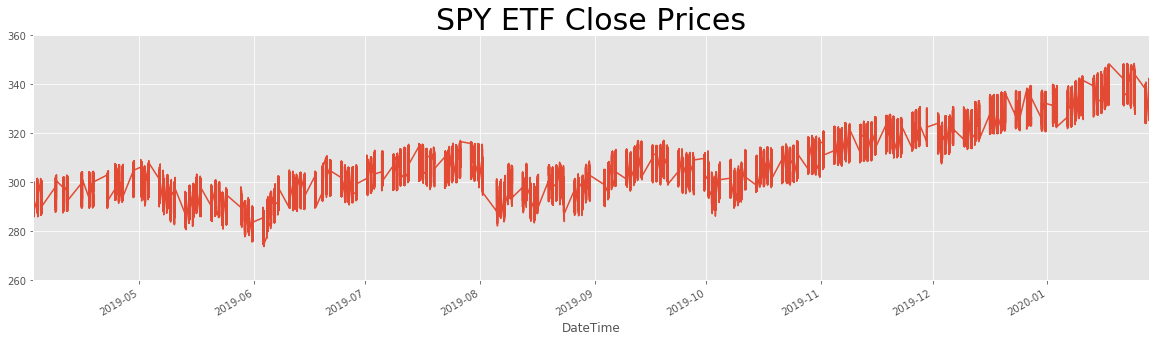

In [45]:
df_train.marketClose.plot(figsize = (20,5))
plt.title('SPY ETF Close Prices',size=30)
plt.ylim(260,360)
plt.show()

# Random Walk Leave now

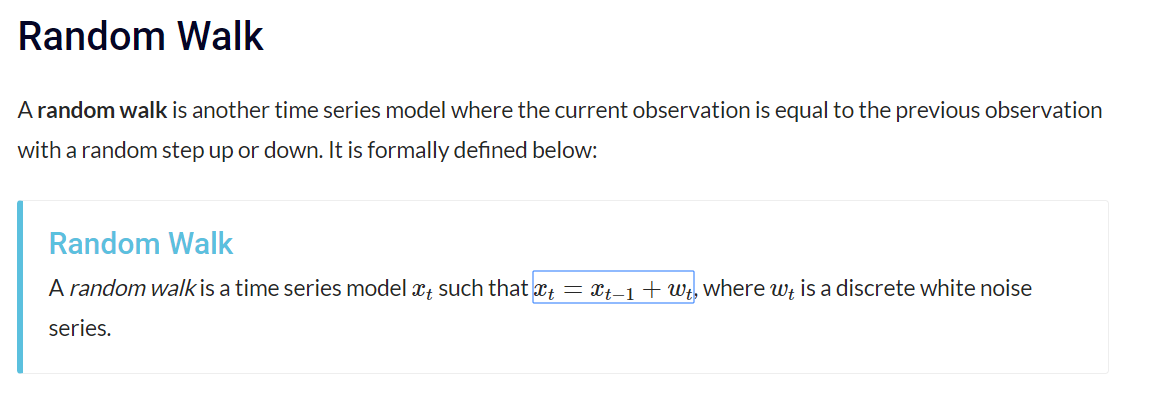

In [46]:
# rw = pd.read_csv("C:/Users/TAN/Downloads/RandWalk.csv")

In [47]:
#rw.head(5)

In [48]:
# rw.date = pd.to_datetime(rw.date,dayfirst = True)
# rw.set_index("date",inplace=True)
# rw = rw.asfreq('b')

In [49]:
#df_train['rw'] = rw['price']


In [50]:
#df_train['rw'] = df_train.rw.fillna(value = df_train.rw.mean())

In [51]:
#df_train = df_train.rw.fillna(df_train.wn.mean())

In [52]:
#df_train.head(10)

In [53]:
# df_train.rw.plot(figsize=(20,5))
# plt.title("Random Walk",size=24)
# plt.show()

# STATIONARITY

In [54]:
df_train.head(5)

,marketClose,wn
DateTime,,
2019-04-02 09:30:00,300.00,299.513947
2019-04-02 09:31:00,292.97,309.319731
2019-04-02 09:32:00,295.12,333.707076
2019-04-02 09:33:00,296.28,311.854687
2019-04-02 09:34:00,296.57,299.331662


In [55]:
import statsmodels.tsa.stattools as sts

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [56]:
sts.adfuller(df_train.marketClose)

(-1.3837772678752445,
 0.5900283177648608,
 64,
 76996,
 {'1%': -3.4304349332176307,
  '5%': -2.861577539027958,
  '10%': -2.566789980732537},
 447085.3544188962)

Null hypothesis - Data is not stationary and here  test statistic is greater than critical value so null hypothesis is not rejected.
Above output shows that data is not stationary
(P value is 0.59(59% chance that data is not stationary), t statistic > critical values(1%,5%,10%))
Autocorrelation coefficient is 4 (which is >1)

In [57]:
sts.adfuller(df_train.wn)

(-276.633886270512,
 0.0,
 0,
 77060,
 {'1%': -3.430434862676403,
  '5%': -2.861577507850389,
  '10%': -2.5667899641377123},
 627140.2185814114)

Above output shows that white noise (wn) data is stationary
(P value is 0.0(0% chance that data is not stationary-->100% chance that data is stationary)
 t statistic < critical values(1%,5%,10%))
 Autocorrelation coefficient is 0 (which is <1)

In [58]:
#sts.adfuller(rw.price)

In [59]:
# Same as the closing price

# Seasonality

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
s_dec_additive = seasonal_decompose(df_train.marketClose, model = "additive",freq=30)

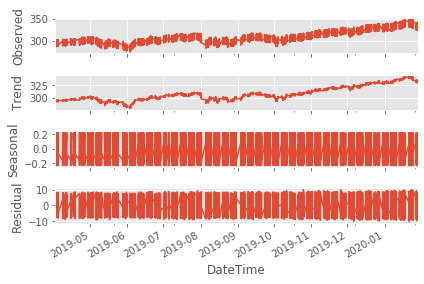

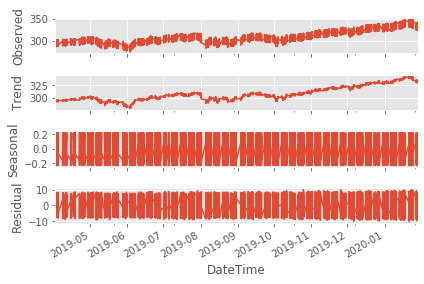

In [62]:
s_dec_additive.plot()

In [63]:
####Data is not seasonal as there is not concrete cyclical pattern

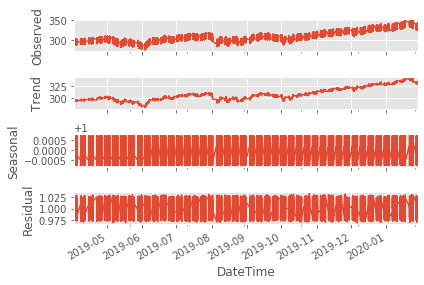

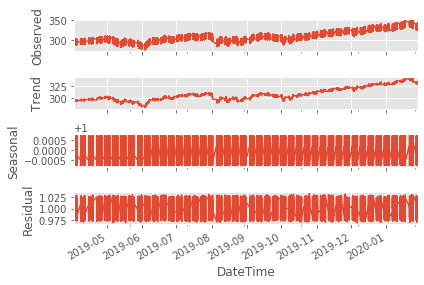

In [64]:
s_dec_multiplicative = seasonal_decompose(df_train.marketClose, model = "multiplicative",freq=30)
s_dec_multiplicative.plot()

# Autocorrelation ACF

In [65]:
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'ACF LAG')

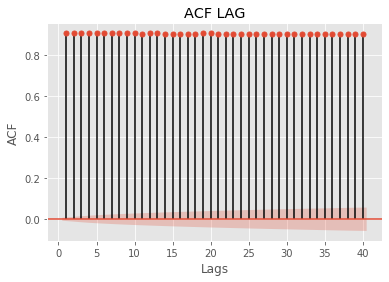

In [66]:
sgt.plot_acf(df_train.marketClose,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title("ACF LAG")

In [67]:
###Stock prices have been consistent till 40 lags, range of ACF varies from -1 to +1
##Shadow area is the Significance
##We can estimate our prediction even through 40 lags
###The greater the distance in time, the more unlikely that autocorrelation exists
###all the lines are higher than the significance, which means this is the indicator of time dependence in the data
###Prices even a month back can serve as decent estimators
###SPY ETF high frequency data prices is highly autocorrelated

Text(0.5, 1.0, 'WHITE NOISE')

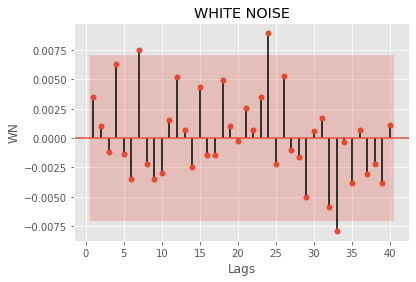

In [68]:
sgt.plot_acf(df_train.wn,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('WN')
plt.title("WHITE NOISE")

In [69]:
###no autocorrelation in lags for white noise

# Partial Autocorrelation function

Text(0.5, 1.0, 'PACF LAG')

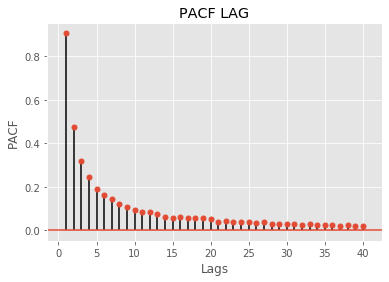

In [70]:
sgt.plot_pacf(df_train.marketClose,lags=40,zero=False,alpha=0.5,method = 'ols')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title("PACF LAG")

In [71]:
###First lag for ACF and PACF is same because there is no value in between one lag and current price
###After some lags all other values are nearly zero, doesn't have any significance so no affect

Text(0.5, 1.0, 'PACF WN')

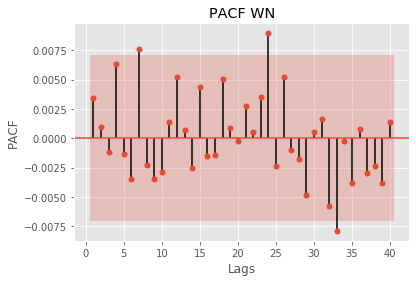

In [72]:
sgt.plot_pacf(df_train.wn,lags=40,zero=False,method = 'ols')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title("PACF WN")

In [73]:
###Again proved no autocorrelation in white noise

# Autoregressive MA model for one lag

In [74]:
from statsmodels.tsa.arima_model import ARMA

# AR 1 Model

In [75]:
model_ar = ARMA(df_train.marketClose,order = (1,0))
# 1 in order represent number of lags, 0 means not taking into residual values into the consideration
# The above is the simple AR(1) model

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [76]:
results_ar = model_ar.fit()

In [77]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(1, 0)   Log Likelihood             -247416.922
Method:                       css-mle   S.D. of innovations              6.000
Date:                Tue, 05 May 2020   AIC                         494839.843
Time:                        14:34:43   BIC                         494867.600
Sample:                             0   HQIC                        494848.367
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4502      0.232   1325.761      0.000     306.996     307.905
ar.L1.marketClose     0.9068      0.002    597.205      0.000       0.904       0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1028           +0.0000j            1.1028            0.0000
-----------------------------------------------------------------------------
"""

In [78]:
#const is the constant
#ar.L1.market_value is the coefficient of 1 lag ago
#standard error - how far away the model predictions from the true value
#z value - associated test statistics for significance
# p value = 0 means constant and one lag value are both significantly different from zero
# last two columns represent the critical values for 95% confidence interval, if zero is not a part of it we can confirm that
# coefficients are significant

In [79]:
# Since one lag is significant, we move towards higher lag to build more accurate model which will be more complex

# Fitting Higher -Lags AR models for Prices

# AR 2 Model

In [80]:
model_ar_2 = ARMA(df_train.marketClose,order = [2,0])
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(2, 0)   Log Likelihood             -237454.073
Method:                       css-mle   S.D. of innovations              5.272
Date:                Tue, 05 May 2020   AIC                         474916.147
Time:                        14:34:47   BIC                         474953.156
Sample:                             0   HQIC                        474927.512
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4529      0.390    788.665      0.000     306.689     308.217
ar.L1.marketClose     0.4740      0.003    149.733      0.000       0.468       0.480
ar.L2.marketClose     0.4773      0.003    150.796      0.000       0.471       0.484
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0337           +0.0000j            1.0337            0.0000
AR.2           -2.0266           +0.0000j            2.0266            0.5000
-----------------------------------------------------------------------------
"""

In [81]:
model_ar_3 = ARMA(df_train.marketClose,order = [3,0])
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(3, 0)   Log Likelihood             -233260.139
Method:                       css-mle   S.D. of innovations              4.993
Date:                Tue, 05 May 2020   AIC                         466530.278
Time:                        14:34:51   BIC                         466576.539
Sample:                             0   HQIC                        466544.483
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4578      0.544    565.363      0.000     306.392     308.524
ar.L1.marketClose     0.3207      0.003     93.996      0.000       0.314       0.327
ar.L2.marketClose     0.3251      0.003     95.459      0.000       0.318       0.332
ar.L3.marketClose     0.3212      0.003     94.136      0.000       0.314       0.328
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0169           -0.0000j            1.0169           -0.0000
AR.2           -1.0146           -1.4257j            1.7499           -0.3484
AR.3           -1.0146           +1.4257j            1.7499            0.3484
-----------------------------------------------------------------------------
"""

In [82]:
model_ar_4 = ARMA(df_train.marketClose,order = [4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(4, 0)   Log Likelihood             -230846.545
Method:                       css-mle   S.D. of innovations              4.839
Date:                Tue, 05 May 2020   AIC                         461705.089
Time:                        14:34:55   BIC                         461760.603
Sample:                             0   HQIC                        461722.136
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4641      0.699    439.646      0.000     306.093     308.835
ar.L1.marketClose     0.2415      0.003     69.182      0.000       0.235       0.248
ar.L2.marketClose     0.2450      0.003     70.192      0.000       0.238       0.252
ar.L3.marketClose     0.2421      0.003     69.366      0.000       0.235       0.249
ar.L4.marketClose     0.2464      0.003     70.581      0.000       0.240       0.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0101           -0.0000j            1.0101           -0.0000
AR.2           -1.6476           -0.0000j            1.6476           -0.5000
AR.3           -0.1726           -1.5520j            1.5616           -0.2676
AR.4           -0.1726           +1.5520j            1.5616            0.2676
-----------------------------------------------------------------------------
"""

In [83]:
model_ar_5 = ARMA(df_train.marketClose,order = (5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(5, 0)   Log Likelihood             -229420.397
Method:                       css-mle   S.D. of innovations              4.750
Date:                Tue, 05 May 2020   AIC                         458854.794
Time:                        14:35:01   BIC                         458919.560
Sample:                             0   HQIC                        458874.682
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4727      0.848    362.478      0.000     305.810     309.135
ar.L1.marketClose     0.1946      0.004     55.016      0.000       0.188       0.201
ar.L2.marketClose     0.

In [84]:
# Higher Log Likelihood and lower Information Criteris means better model

In [85]:
## Log likelihood should increas and information criteria(AIC,BIC,HQIC) should decrease
# p < 0.05 --> lags are significant different and can be used for prediction
# p > 0.05 ---> Insignigicant to predict using this lag

In [86]:
# Log Likelohood test to compare multiple lag models and decide till what lag we can take

In [87]:
#In statistics, the likelihood-ratio test assesses the goodness of fit of two competing statistical 
#models based on the ratio of their likelihoods, specifically one found by maximization over 
#the entire parameter space and another found after imposing some constraint
# more lags more better model

In [88]:
from scipy.stats import chi2
def LLR(mod1,mod2,DF=1):
    L1 = mod1.llf
    L2 = mod2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

In [89]:
LLR(results_ar_2,results_ar_3)

0.0

In [90]:
model_ar_5 = ARMA(df_train.marketClose,order = (5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("LLR Test: " + str(LLR(results_ar_2,results_ar_5)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(5, 0)   Log Likelihood             -229420.397
Method:                       css-mle   S.D. of innovations              4.750
Date:                Tue, 05 May 2020   AIC                         458854.794
Time:                        14:35:07   BIC                         458919.560
Sample:                             0   HQIC                        458874.682
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4727      0.848    362.478      0.000     305.810     309.135
ar.L1.marketClose     0.1946      0.004     55.016      0.000       0.188       0.201
ar.L2.marketClose     0.

In [91]:
model_ar_6 = ARMA(df_train.marketClose,order = (6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("LLR Test: " + str(LLR(results_ar_2,results_ar_6)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(6, 0)   Log Likelihood             -228407.058
Method:                       css-mle   S.D. of innovations              4.688
Date:                Tue, 05 May 2020   AIC                         456830.116
Time:                        14:35:15   BIC                         456904.135
Sample:                             0   HQIC                        456852.845
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4827      0.998    308.108      0.000     305.527     309.439
ar.L1.marketClose     0.1638      0.004     46.084      0.000       0.157       0.171
ar.L2.marketClose     0.

In [92]:
model_ar_7 = ARMA(df_train.marketClose,order = (7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("LLR Test: " + str(LLR(results_ar_6,results_ar_7)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(7, 0)   Log Likelihood             -227616.280
Method:                       css-mle   S.D. of innovations              4.640
Date:                Tue, 05 May 2020   AIC                         455250.561
Time:                        14:35:26   BIC                         455333.832
Sample:                             0   HQIC                        455276.131
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4972      1.152    266.923      0.000     305.239     309.755
ar.L1.marketClose     0.1409      0.004     39.510      0.000       0.134       0.148
ar.L2.marketClose     0.

In [93]:
model_ar_8 = ARMA(df_train.marketClose,order = (8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("LLR Test: " + str(LLR(results_ar_7,results_ar_8)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(8, 0)   Log Likelihood             -227032.698
Method:                       css-mle   S.D. of innovations              4.605
Date:                Tue, 05 May 2020   AIC                         454085.397
Time:                        14:35:40   BIC                         454177.920
Sample:                             0   HQIC                        454113.808
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.5089      1.303    235.961      0.000     304.955     310.063
ar.L1.marketClose     0.1234      0.004     34.515      0.000       0.116       0.130
ar.L2.marketClose     0.

In [94]:
model_ar_9 = ARMA(df_train.marketClose,order = (9,0))
results_ar_9 = model_ar_9.fit()
print(results_ar_9.summary())
print("LLR Test: " + str(LLR(results_ar_8,results_ar_9)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(9, 0)   Log Likelihood             -226583.220
Method:                       css-mle   S.D. of innovations              4.578
Date:                Tue, 05 May 2020   AIC                         453188.440
Time:                        14:35:57   BIC                         453290.216
Sample:                             0   HQIC                        453219.693
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.5249      1.452    211.724      0.000     304.678     310.372
ar.L1.marketClose     0.1102      0.004     30.767      0.000       0.103       0.117
ar.L2.marketClose     0.

In [95]:
# Higher lag models are good fit but this is beacuse the prices are highly correlated and not stationary as resulted from 
# Dickey Fuller Test
# We should take returns

# Returns

In [96]:
df.head(2)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.00
1,2019-04-02 09:31:00,292.97


In [97]:
df2['returns'] = df2.marketClose.pct_change(1).mul(100)

In [98]:
df3 = df2.iloc[1:]

In [99]:
df3.head(10)

,marketClose,returns
DateTime,,
2019-04-02 09:31:00,292.970,-2.343333
2019-04-02 09:32:00,295.120,0.733864
2019-04-02 09:33:00,296.280,0.393060
2019-04-02 09:34:00,296.570,0.097880
2019-04-02 09:35:00,297.900,0.448461
2019-04-02 09:36:00,294.873,-1.016113
2019-04-02 09:37:00,295.160,0.097330
2019-04-02 09:38:00,294.560,-0.203280
2019-04-02 09:39:00,297.519,1.004549


In [100]:
sts.adfuller(df3.returns)

(-54.965223212211036,
 0.0,
 60,
 96265,
 {'1%': -3.4304179320041697,
  '5%': -2.8615700248687177,
  '10%': -2.566785981189216},
 346007.8094200365)

In [101]:
# Test statistic is far less then the critical values, therefore null hypothesis is rejected --> Returns are stationary

In [102]:
## Transformed SPY stock close price which were non stationary as tested by adfuller test earlier are transformed
## to stationary series by replacing close price with returns


Text(0.5, 1.0, 'ACF for returns')

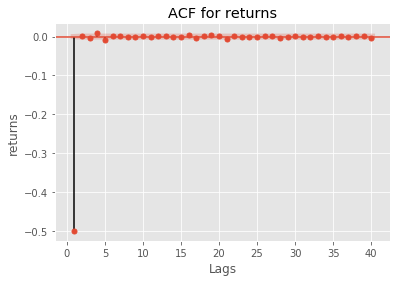

In [134]:
## ACF for returns
sgt.plot_acf(df3.returns,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('returns')
plt.title("ACF for returns")

Text(0.5, 1.0, 'PACF Returns')

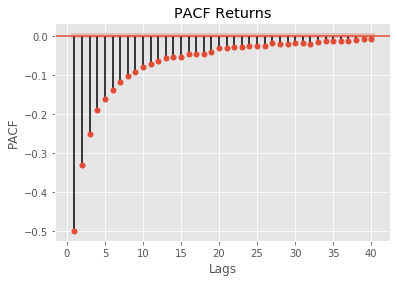

In [104]:
sgt.plot_pacf(df3.returns,lags=40,zero=False,method = 'ols')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title("PACF Returns")

# AR Model For Returns

In [105]:
model_ret_ar_1 = ARMA(df3.returns,order=(1,0))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [106]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [107]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(1, 0)   Log Likelihood             -189553.605
Method:                       css-mle   S.D. of innovations              1.731
Date:                Tue, 05 May 2020   AIC                         379113.211
Time:                        14:36:30   BIC                         379141.637
Sample:                             0   HQIC                        379121.852
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.004      5.363      0.000       0.013       0.027
ar.L1.returns    -0.5000      0.003   -179.180      0.000      -0.505      -0.495
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0001           +0.0000j            2.0001            0.5000
-----------------------------------------------------------------------------
"""

In [108]:
# AR2 Model

In [109]:
model_ret_ar_2 = ARMA(df3.returns,order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(2, 0)   Log Likelihood             -183967.506
Method:                       css-mle   S.D. of innovations              1.634
Date:                Tue, 05 May 2020   AIC                         367943.013
Time:                        14:36:31   BIC                         367980.915
Sample:                             0   HQIC                        367954.534
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.003      7.565      0.000       0.015       0.025
ar.L1.returns    -0.6654      0.003   -218.858      0.000      -0.671      -0.659
ar.L2.returns    -0.3309      0.003   -108.839      0.000      -0.337      -0.325
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0054           -1.4181j            1.7383           -0.3482
AR.2           -1.0054           +1.4181j            1.7383            0.3482
-----------------------------------------------------------------------------
"""

In [110]:
# model_ar_9 = ARMA(df_train.marketClose,order = (9,0))
# results_ar_9 = model_ar_9.fit()
# print(results_ar_9.summary())
print("LLR Test: " + str(LLR(results_ret_ar_1,results_ret_ar_2)))
# for better model one should have high log likelihood, low information criteria, p value less than 0.05

LLR Test: 0.0


In [111]:
model_ret_ar_3 = ARMA(df3.returns,order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
print(results_ret_ar_3.summary())
print("LLR Test: " + str(LLR(results_ret_ar_2,results_ret_ar_3)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(3, 0)   Log Likelihood             -180817.523
Method:                       css-mle   S.D. of innovations              1.581
Date:                Tue, 05 May 2020   AIC                         361645.045
Time:                        14:36:34   BIC                         361692.423
Sample:                             0   HQIC                        361659.447
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.002      9.783      0.000       0.016       0.024
ar.L1.returns    -0.7487      0.003   -240.094      0.000      -0.755      -0.743
ar.L2.returns    -0.4984      0.004   -1

In [112]:
model_ret_ar_4 = ARMA(df3.returns,order=(4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print("LLR Test: " + str(LLR(results_ret_ar_3,results_ret_ar_4)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(4, 0)   Log Likelihood             -179038.736
Method:                       css-mle   S.D. of innovations              1.552
Date:                Tue, 05 May 2020   AIC                         358089.472
Time:                        14:36:49   BIC                         358146.324
Sample:                             0   HQIC                        358106.754
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.002     11.864      0.000       0.017       0.023
ar.L1.returns    -0.7966      0.003   -251.848      0.000      -0.803      -0.790
ar.L2.returns    -0.5933      0.004   -1

In [113]:
model_ret_ar_5 = ARMA(df3.returns,order=(5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print("LLR Test: " + str(LLR(results_ret_ar_4,results_ret_ar_5)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(5, 0)   Log Likelihood             -177766.027
Method:                       css-mle   S.D. of innovations              1.532
Date:                Tue, 05 May 2020   AIC                         355546.053
Time:                        14:37:14   BIC                         355612.382
Sample:                             0   HQIC                        355566.216
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     13.963      0.000       0.017       0.023
ar.L1.returns    -0.8274      0.003   -260.200      0.000      -0.834      -0.821
ar.L2.returns    -0.6569      0.004   -1

In [114]:
model_ret_ar_6 = ARMA(df3.returns,order=(6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print("LLR Test: " + str(LLR(results_ret_ar_5,results_ret_ar_6)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(6, 0)   Log Likelihood             -176823.083
Method:                       css-mle   S.D. of innovations              1.517
Date:                Tue, 05 May 2020   AIC                         353662.166
Time:                        14:37:51   BIC                         353737.970
Sample:                             0   HQIC                        353685.210
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     16.064      0.000       0.018       0.022
ar.L1.returns    -0.8499      0.003   -266.358      0.000      -0.856      -0.844
ar.L2.returns    -0.7013      0.004   -1

In [115]:
model_ret_ar_7 = ARMA(df3.returns,order=(7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
print(results_ret_ar_7.summary())
print("LLR Test: " + str(LLR(results_ret_ar_6,results_ret_ar_7)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(7, 0)   Log Likelihood             -176138.426
Method:                       css-mle   S.D. of innovations              1.506
Date:                Tue, 05 May 2020   AIC                         352294.851
Time:                        14:38:50   BIC                         352380.131
Sample:                             0   HQIC                        352320.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     18.101      0.000       0.018       0.022
ar.L1.returns    -0.8664      0.003   -270.816      0.000      -0.873      -0.860
ar.L2.returns    -0.7342      0.004   -1

In [116]:
model_ret_ar_8 = ARMA(df3.returns,order=(8,0))
results_ret_ar_8 = model_ret_ar_8.fit()
print(results_ret_ar_8.summary())
print("LLR Test: " + str(LLR(results_ret_ar_7,results_ret_ar_8)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(8, 0)   Log Likelihood             -175615.564
Method:                       css-mle   S.D. of innovations              1.498
Date:                Tue, 05 May 2020   AIC                         351251.129
Time:                        14:40:14   BIC                         351345.884
Sample:                             0   HQIC                        351279.933
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     20.090      0.000       0.018       0.022
ar.L1.returns    -0.8787      0.003   -274.214      0.000      -0.885      -0.872
ar.L2.returns    -0.7592      0.004   -1

In [117]:
model_ret_ar_9 = ARMA(df3.returns,order=(9,0))
results_ret_ar_9 = model_ret_ar_9.fit()
print(results_ret_ar_9.summary())
print("LLR Test: " + str(LLR(results_ret_ar_8,results_ret_ar_9)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(9, 0)   Log Likelihood             -175208.425
Method:                       css-mle   S.D. of innovations              1.492
Date:                Tue, 05 May 2020   AIC                         350438.850
Time:                        14:41:55   BIC                         350543.081
Sample:                             0   HQIC                        350470.535
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     22.026      0.000       0.018       0.022
ar.L1.returns    -0.8883      0.003   -276.856      0.000      -0.895      -0.882
ar.L2.returns    -0.7783      0.004   -1

In [118]:
model_ret_ar_10 = ARMA(df3.returns,order=(10,0))
results_ret_ar_10 = model_ret_ar_10.fit()
print(results_ret_ar_10.summary())
print("LLR Test: " + str(LLR(results_ret_ar_9,results_ret_ar_10)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                    ARMA(10, 0)   Log Likelihood             -174904.601
Method:                       css-mle   S.D. of innovations              1.487
Date:                Tue, 05 May 2020   AIC                         349833.202
Time:                        14:44:11   BIC                         349946.908
Sample:                             0   HQIC                        349867.767
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0199      0.001     23.847      0.000       0.018       0.022
ar.L1.returns     -0.8956      0.003   -278.825      0.000      -0.902      -0.889
ar.L2.returns     -0.7930      0.004

# NORMALIZING Actual Price

In [119]:
#df.head(4)

In [120]:
# Normalizing market_value first - dividing each value by the benchmark(consider first value) and multiply by 100{This is done
#for easy comparison between time series in percentage}
#benchmark = df.market_value.iloc[0]

In [121]:
#df['norma'] = df.market_value.div(benchmark).mul(100)

In [122]:
#sts.adfuller(df.norma)

In [123]:
## As seen test statistics is higher than critical values and p value is >0.05--> the data is not stationary so we move to 
# calculate the normalized return

# Normalizing Returns

In [124]:
#bench_mark = df.returns.iloc[0]

In [125]:
#df['norm_ret'] = df.returns.div(bench_mark).mul(100)

In [126]:
#sts.adfuller(df.norm_ret)

In [127]:
## Test statistics  is less than critical values and p value is <0.05 which shows data is stationary

In [128]:
## NORMALIZING DOES NOT AFFECT STATIONARITY

# AR MODEL RESIDUALS

In [150]:
# Analysing the residuals to rpove that residuals follow white noise -
# Do this for both price and returns
# 1. returns should be stationary (check by dickey fuller test)
# 2. we have already calculate the best AR model that fits the data best using LLR test
# 3. check the residuals of the best fitter AR model for both price and returns
# 4. calculate the mean and variance of residuals, they should be around 0 to follow white nose
# 5. Plot ACF to verify that resiudals are not significant because noise don't depend on the previous lagged versions as they are not autocorrelated

In [129]:
df3.head(10)

,marketClose,returns
DateTime,,
2019-04-02 09:31:00,292.970,-2.343333
2019-04-02 09:32:00,295.120,0.733864
2019-04-02 09:33:00,296.280,0.393060
2019-04-02 09:34:00,296.570,0.097880
2019-04-02 09:35:00,297.900,0.448461
2019-04-02 09:36:00,294.873,-1.016113
2019-04-02 09:37:00,295.160,0.097330
2019-04-02 09:38:00,294.560,-0.203280
2019-04-02 09:39:00,297.519,1.004549


In [130]:
df3['res_price'] = model_ar_9.fit().resid

ValueError: x contains a constant. Adding a constant with trend='c' is not allowed.

# MA MODEL

Text(0.5, 1.0, 'ACF for returns')

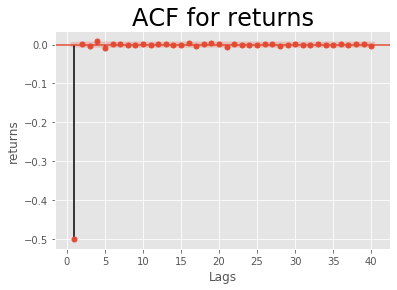

In [131]:
sgt.plot_acf(df3.returns[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('returns')
plt.title("ACF for returns",size=24)

In [133]:
model_ret_ma_1 = ARMA(df3.returns,order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(0, 1)   Log Likelihood             -173089.785
Method:                       css-mle   S.D. of innovations              1.459
Date:                Tue, 05 May 2020   AIC                         346185.571
Time:                        14:52:32   BIC                         346213.997
Sample:                             0   HQIC                        346194.212
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     69.083      0.000       0.019       0.021
ma.L1.returns    -0.9386      0.001   -804.398      0.000      -0.941      -0.936
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0654           +0.0000j            1.0654            0.0000
-----------------------------------------------------------------------------
"""

In [135]:
# order component is 0,1 - (AR component, MA Component)
# 1st order lag is significant
# Now fitting higher models

In [142]:
model_ret_ma_2 = ARMA(df3.returns,order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()
print(results_ret_ma_2.summary())
print("LLR Test: " + str(LLR(results_ret_ma_1,results_ret_ma_2)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(0, 2)   Log Likelihood             -173089.505
Method:                       css-mle   S.D. of innovations              1.459
Date:                Tue, 05 May 2020   AIC                         346187.010
Time:                        15:06:20   BIC                         346224.912
Sample:                             0   HQIC                        346198.532
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     69.283      0.000       0.019       0.021
ma.L1.returns    -0.9364      0.003   -291.921      0.000      -0.943      -0.930
ma.L2.returns    -0.0024      0.003     

In [138]:
## 2nd lag model is not significant as p value is 0.454
## Checking for higher models

In [148]:
model_ret_ma_3 = ARMA(df3.returns,order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("LLR Test: " + str(LLR(results_ret_ma_2,results_ret_ma_3)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [149]:
# Check for higher lagged models - until you get a high significant model
# Regularly do LLR test to compare different models